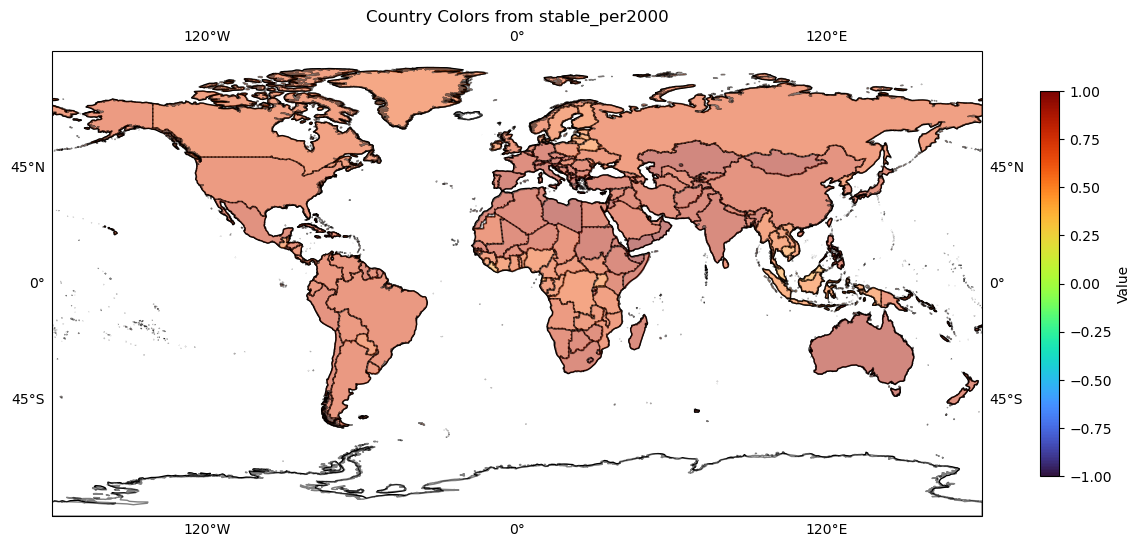

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Step 1: Read CSV
country_values = {}
with open("G:\\Hangkai\\Forest_edge\\country_stats\\final_data\\processed_country_data.csv", 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)  # save header
    for row in reader:
        country_values[row[0]] = float(row[2])

        
# Step 2: Color each country by cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  linewidth=0, color='black', alpha=1, 
                  xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                  ylocs=[-90, -45, 0, 45, 90])
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

cmap = plt.cm.turbo
norm = plt.Normalize(min(country_values.values()), max(country_values.values()))

for country in reader.records():
    sovereign_name = country.attributes['SOVEREIGNT']
    if sovereign_name in country_values:
        value = country_values[sovereign_name]
        if value == -1:
            color = 'white'  # if the value is -1, set color to white
        else:
            color = cmap(norm(value))
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=color,
                          edgecolor='k', alpha=0.5)

# Step 3: add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Value')

plt.title(f'Country Colors from {header[2]}')
plt.show()

Vatican	0.2983	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0.2983	0.2983


Note that Vatican has no change for it forest edge